In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as sm

In [2]:
df = pd.read_csv('Data/alldata1.csv')

In [3]:
df=df.drop(["Unnamed: 0"],axis=1)
df

,date,state,city,n_killed,n_injured,incident_id
0,1/1/2013,Pennsylvania,Mckeesport,0,4,461105
1,1/1/2013,California,Hawthorne,1,3,460726
2,1/1/2013,Ohio,Lorain,1,3,478855
3,1/5/2013,Colorado,Aurora,4,0,478925
4,1/7/2013,North Carolina,Greensboro,2,2,478959
...,...,...,...,...,...,...
397773,12/31/2020,Illinois,Aurora,1,1,1891485
397774,12/31/2020,Minnesota,Saint Paul (Maplewood),0,0,1895146
397775,12/31/2020,California,Reseda,1,0,1894198
397776,12/31/2020,Florida,West Palm Beach,1,0,1891062


In [4]:
df_nics = pd.read_csv('Data/nics-firearm-background-checks.csv')
df_nics

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2021-05,Alabama,28248.0,317.0,21664.0,12423.0,1334.0,865,0.0,19.0,...,0.0,0.0,0.0,29.0,15.0,9.0,1.0,0.0,0.0,66937
1,2021-05,Alaska,307.0,7.0,3368.0,2701.0,323.0,208,0.0,1.0,...,0.0,0.0,0.0,12.0,14.0,0.0,0.0,0.0,0.0,7145
2,2021-05,Arizona,21767.0,695.0,20984.0,9259.0,1676.0,1010,0.0,7.0,...,5.0,0.0,0.0,11.0,10.0,1.0,0.0,1.0,0.0,56581
3,2021-05,Arkansas,7697.0,1171.0,8501.0,5072.0,422.0,340,3.0,7.0,...,0.0,0.0,0.0,8.0,8.0,2.0,0.0,0.0,0.0,24206
4,2021-05,California,20742.0,11514.0,40160.0,25824.0,5576.0,0,0.0,11.0,...,129.0,0.0,0.0,8165.0,3024.0,657.0,36.0,12.0,1.0,119739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14900,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
14901,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
14902,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
14903,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241


In [5]:
df_nics2=df_nics.copy()

In [6]:
df_nics2

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2021-05,Alabama,28248.0,317.0,21664.0,12423.0,1334.0,865,0.0,19.0,...,0.0,0.0,0.0,29.0,15.0,9.0,1.0,0.0,0.0,66937
1,2021-05,Alaska,307.0,7.0,3368.0,2701.0,323.0,208,0.0,1.0,...,0.0,0.0,0.0,12.0,14.0,0.0,0.0,0.0,0.0,7145
2,2021-05,Arizona,21767.0,695.0,20984.0,9259.0,1676.0,1010,0.0,7.0,...,5.0,0.0,0.0,11.0,10.0,1.0,0.0,1.0,0.0,56581
3,2021-05,Arkansas,7697.0,1171.0,8501.0,5072.0,422.0,340,3.0,7.0,...,0.0,0.0,0.0,8.0,8.0,2.0,0.0,0.0,0.0,24206
4,2021-05,California,20742.0,11514.0,40160.0,25824.0,5576.0,0,0.0,11.0,...,129.0,0.0,0.0,8165.0,3024.0,657.0,36.0,12.0,1.0,119739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14900,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
14901,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
14902,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
14903,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241


In [7]:
df_nics2["month"]=pd.to_datetime(df_nics2['month'])
df_nics2['month'] = df_nics2['month'].dt.strftime('%Y-%m')
df_nics2["year"] = pd.to_datetime(df_nics2['month'])
df_nics2["year"] = df_nics2['year'].dt.strftime('%Y')
df_nics2["year"]=df_nics2["year"].astype(str).astype(int)
df_nics2=df_nics2[df_nics2.year < 2021]
#take out nics that in 2021 and clean up the columns

In [8]:
df_nics_clean=df_nics2.drop(["return_to_seller_other","return_to_seller_long_gun","return_to_seller_handgun",
             "totals", "rentals_handgun","rentals_long_gun","admin",
             'prepawn_handgun', 'prepawn_long_gun','prepawn_other',
                            'returned_handgun', 'returned_long_gun','returned_other'], axis=1)
#drop columns that we don't find relevant to analysis of total nics

In [9]:
df_nics_clean = df_nics_clean[(df_nics_clean['year'] >= 2013) &
                              (df_nics_clean['year'] <= 2020)]
df_nics_clean["total"]=df_nics_clean.loc[:,['permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'private_sale_handgun', 'private_sale_long_gun',
       'private_sale_other']].sum(axis=1)
#filter data between 2013 and 2020

In [10]:
df_nics_clean

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,redemption_handgun,redemption_long_gun,redemption_other,private_sale_handgun,private_sale_long_gun,private_sale_other,year,total
275,2020-12,Alabama,33421.0,505.0,31103.0,28933.0,1855.0,1388,2447.0,1121.0,9.0,30.0,23.0,5.0,2020,100840.0
276,2020-12,Alaska,441.0,3.0,3658.0,3822.0,430.0,233,123.0,84.0,1.0,9.0,10.0,1.0,2020,8815.0
277,2020-12,Arizona,9043.0,846.0,25093.0,14562.0,1942.0,1395,1082.0,349.0,4.0,21.0,8.0,3.0,2020,54348.0
278,2020-12,Arkansas,3878.0,900.0,10987.0,12719.0,587.0,510,1043.0,935.0,2.0,2.0,14.0,1.0,2020,31578.0
279,2020-12,California,26034.0,1788.0,59909.0,39389.0,6932.0,0,450.0,273.0,20.0,523.0,27.0,0.0,2020,135345.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,2013-01,Virginia,0.0,NaN,34636.0,24775.0,1426.0,0,0.0,0.0,0.0,NaN,NaN,NaN,2013,60837.0
5551,2013-01,Washington,22087.0,NaN,28505.0,18241.0,1252.0,778,1310.0,1352.0,4.0,NaN,NaN,NaN,2013,73529.0
5552,2013-01,West Virginia,615.0,NaN,12197.0,10377.0,318.0,597,957.0,1707.0,1.0,NaN,NaN,NaN,2013,26769.0
5553,2013-01,Wisconsin,15439.0,NaN,25154.0,15454.0,593.0,49,52.0,230.0,0.0,NaN,NaN,NaN,2013,56971.0


#adds year as new column
df_nics["month"]=pd.to_datetime(df_nics['month'])
df_nics["year_only"] = pd.to_datetime(df_nics['month'])
df_nics["year_only"] = df_nics['year_only'].dt.strftime('%Y')
#adds month as new column
#df_nics["month"] = df_nics['month'].dt.strftime('%m')
df_nics

In [ ]:
# df_policy = pd.read_csv('gunpolicydata.csv')

In [ ]:
# df_policy

In [ ]:
# df_policytotal=df_policy.copy()

In [ ]:
# df_policytotal=df_policytotal[["state","year","lawtotal"]]

In [ ]:
# df_policytotal.dtypes

In [ ]:
# df_policytotal=df_policytotal[df_policytotal.year > 2012]

In [11]:
df["year"] = pd.to_datetime(df['date'])
df["year"] = df['year'].dt.strftime('%Y')
df['month']=pd.to_datetime(df['date'])
df["month"]= df["month"].dt.to_period(freq ="M")
df['month'] = df['month'].dt.strftime('%Y-%m')
#clean data for alldata dataset

In [12]:
df

,date,state,city,n_killed,n_injured,incident_id,year,month
0,1/1/2013,Pennsylvania,Mckeesport,0,4,461105,2013,2013-01
1,1/1/2013,California,Hawthorne,1,3,460726,2013,2013-01
2,1/1/2013,Ohio,Lorain,1,3,478855,2013,2013-01
3,1/5/2013,Colorado,Aurora,4,0,478925,2013,2013-01
4,1/7/2013,North Carolina,Greensboro,2,2,478959,2013,2013-01
...,...,...,...,...,...,...,...,...
397773,12/31/2020,Illinois,Aurora,1,1,1891485,2020,2020-12
397774,12/31/2020,Minnesota,Saint Paul (Maplewood),0,0,1895146,2020,2020-12
397775,12/31/2020,California,Reseda,1,0,1894198,2020,2020-12
397776,12/31/2020,Florida,West Palm Beach,1,0,1891062,2020,2020-12


In [13]:
df.dtypes

date           object
state          object
city           object
n_killed        int64
n_injured       int64
incident_id     int64
year           object
month          object
dtype: object

In [14]:
df_nics_clean

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,redemption_handgun,redemption_long_gun,redemption_other,private_sale_handgun,private_sale_long_gun,private_sale_other,year,total
275,2020-12,Alabama,33421.0,505.0,31103.0,28933.0,1855.0,1388,2447.0,1121.0,9.0,30.0,23.0,5.0,2020,100840.0
276,2020-12,Alaska,441.0,3.0,3658.0,3822.0,430.0,233,123.0,84.0,1.0,9.0,10.0,1.0,2020,8815.0
277,2020-12,Arizona,9043.0,846.0,25093.0,14562.0,1942.0,1395,1082.0,349.0,4.0,21.0,8.0,3.0,2020,54348.0
278,2020-12,Arkansas,3878.0,900.0,10987.0,12719.0,587.0,510,1043.0,935.0,2.0,2.0,14.0,1.0,2020,31578.0
279,2020-12,California,26034.0,1788.0,59909.0,39389.0,6932.0,0,450.0,273.0,20.0,523.0,27.0,0.0,2020,135345.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,2013-01,Virginia,0.0,NaN,34636.0,24775.0,1426.0,0,0.0,0.0,0.0,NaN,NaN,NaN,2013,60837.0
5551,2013-01,Washington,22087.0,NaN,28505.0,18241.0,1252.0,778,1310.0,1352.0,4.0,NaN,NaN,NaN,2013,73529.0
5552,2013-01,West Virginia,615.0,NaN,12197.0,10377.0,318.0,597,957.0,1707.0,1.0,NaN,NaN,NaN,2013,26769.0
5553,2013-01,Wisconsin,15439.0,NaN,25154.0,15454.0,593.0,49,52.0,230.0,0.0,NaN,NaN,NaN,2013,56971.0


In [16]:
df_nics_clean.dtypes

month                    datetime64[ns]
state                            object
permit                          float64
permit_recheck                  float64
handgun                         float64
long_gun                        float64
other                           float64
multiple                          int64
redemption_handgun              float64
redemption_long_gun             float64
redemption_other                float64
private_sale_handgun            float64
private_sale_long_gun           float64
private_sale_other              float64
year                              int32
total                           float64
dtype: object

In [16]:
df_nics_clean=df_nics_clean.rename({'total': 'total_nics'},axis=1)
df_nics_clean

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,redemption_handgun,redemption_long_gun,redemption_other,private_sale_handgun,private_sale_long_gun,private_sale_other,year,total_nics
275,2020-12,Alabama,33421.0,505.0,31103.0,28933.0,1855.0,1388,2447.0,1121.0,9.0,30.0,23.0,5.0,2020,100840.0
276,2020-12,Alaska,441.0,3.0,3658.0,3822.0,430.0,233,123.0,84.0,1.0,9.0,10.0,1.0,2020,8815.0
277,2020-12,Arizona,9043.0,846.0,25093.0,14562.0,1942.0,1395,1082.0,349.0,4.0,21.0,8.0,3.0,2020,54348.0
278,2020-12,Arkansas,3878.0,900.0,10987.0,12719.0,587.0,510,1043.0,935.0,2.0,2.0,14.0,1.0,2020,31578.0
279,2020-12,California,26034.0,1788.0,59909.0,39389.0,6932.0,0,450.0,273.0,20.0,523.0,27.0,0.0,2020,135345.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,2013-01,Virginia,0.0,NaN,34636.0,24775.0,1426.0,0,0.0,0.0,0.0,NaN,NaN,NaN,2013,60837.0
5551,2013-01,Washington,22087.0,NaN,28505.0,18241.0,1252.0,778,1310.0,1352.0,4.0,NaN,NaN,NaN,2013,73529.0
5552,2013-01,West Virginia,615.0,NaN,12197.0,10377.0,318.0,597,957.0,1707.0,1.0,NaN,NaN,NaN,2013,26769.0
5553,2013-01,Wisconsin,15439.0,NaN,25154.0,15454.0,593.0,49,52.0,230.0,0.0,NaN,NaN,NaN,2013,56971.0


In [28]:
df_months

,month,state,n_killed,n_injured,total
0,2013-01,California,1,7,8
1,2013-01,Colorado,4,0,4
2,2013-01,District of Columbia,0,5,5
3,2013-01,Louisiana,2,8,10
4,2013-01,Maryland,1,6,7
...,...,...,...,...,...
4446,2020-12,Virginia,42,72,114
4447,2020-12,Washington,12,22,34
4448,2020-12,West Virginia,26,10,36
4449,2020-12,Wisconsin,22,78,100


In [25]:
len(df_months.month.unique())

96

In [26]:
len(df_nics_clean.month.unique())

96

In [29]:
len(df_months.state.unique())

51

In [30]:
len(df_nics_clean.state.unique())

55

In [31]:
df_months.state.unique()

array(['California', 'Colorado', 'District of Columbia', 'Louisiana',
       'Maryland', 'Missouri', 'New Mexico', 'North Carolina', 'Ohio',
       'Oklahoma', 'Pennsylvania', 'Tennessee', 'Delaware', 'Georgia',
       'Illinois', 'Michigan', 'Utah', 'Florida', 'Indiana',
       'Mississippi', 'New York', 'Washington', 'Arizona', 'Kentucky',
       'South Carolina', 'New Jersey', 'Virginia', 'Rhode Island',
       'Texas', 'Wisconsin', 'Alabama', 'Connecticut', 'Kansas',
       'West Virginia', 'Minnesota', 'Nevada', 'Nebraska', 'Alaska',
       'Arkansas', 'Hawaii', 'Idaho', 'Iowa', 'Maine', 'Massachusetts',
       'Montana', 'New Hampshire', 'North Dakota', 'Oregon',
       'South Dakota', 'Vermont', 'Wyoming'], dtype=object)

In [32]:
df_nics_clean.state.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Mariana Islands', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [33]:
set(df_months.state.unique()) ^ set(df_nics_clean.state.unique())

{'Guam', 'Mariana Islands', 'Puerto Rico', 'Virgin Islands'}

In [76]:
states_total_incidents=df.groupby(['state','year']).size()
states_total_incidents_df=pd.DataFrame(states_total_incidents)
states_total_incidents_df.rename(columns = {0:"Incidents"},inplace =True)
states_total_incidents_df.head(50)
#groupby state, year on all data

Incidents
state       year           
Alabama     2013          2
            2014       1318
            2015       1034
            2016       1309
            2017       1461
            2018       1322
            2019       1337
            2020       1237
Alaska      2014        146
            2015        380
            2016        445
            2017        317
            2018        232
            2019        142
            2020        107
Arizona     2013          5
            2014        556
            2015        480
            2016        554
            2017        587
            2018        536
            2019        629
            2020        849
Arkansas    2014        572
            2015        538
            2016        720
            2017        820
            2018        809
            2019        729
            2020        651
California  2013         39
            2014       3732
            2015       3234
            2016       3617
            2017       4588
            2018       3685
            2019       3268
            2020       3658
Colorado    2013          3
            2014        556
            2015        788
            2016        812
            2017        809
            2018        791
            2019        709
            2020        856
Connecticut 2013          3
            2014        583
            2015        737
            2016        803

In [15]:
df_months=df.groupby(['month',"state"])[["n_killed","n_injured"]].sum().reset_index()
df_months["total"]=df_months["n_killed"]+df_months["n_injured"]
df_months

#create a dataframe that's filtered out by months

,month,state,n_killed,n_injured,total
0,2013-01,California,1,7,8
1,2013-01,Colorado,4,0,4
2,2013-01,District of Columbia,0,5,5
3,2013-01,Louisiana,2,8,10
4,2013-01,Maryland,1,6,7
...,...,...,...,...,...
4446,2020-12,Virginia,42,72,114
4447,2020-12,Washington,12,22,34
4448,2020-12,West Virginia,26,10,36
4449,2020-12,Wisconsin,22,78,100


In [36]:
merged_df = pd.merge(df_nics_clean, df_months[["state","month","n_killed","n_injured","total"]], on=["state","month"])
merged_df
#merge nics with the months dataframe

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,redemption_handgun,redemption_long_gun,redemption_other,private_sale_handgun,private_sale_long_gun,private_sale_other,year,total_nics,n_killed,n_injured,total
0,2020-12,Alabama,33421.0,505.0,31103.0,28933.0,1855.0,1388,2447.0,1121.0,9.0,30.0,23.0,5.0,2020,100840.0,44,62,106
1,2020-12,Alaska,441.0,3.0,3658.0,3822.0,430.0,233,123.0,84.0,1.0,9.0,10.0,1.0,2020,8815.0,1,7,8
2,2020-12,Arizona,9043.0,846.0,25093.0,14562.0,1942.0,1395,1082.0,349.0,4.0,21.0,8.0,3.0,2020,54348.0,38,31,69
3,2020-12,Arkansas,3878.0,900.0,10987.0,12719.0,587.0,510,1043.0,935.0,2.0,2.0,14.0,1.0,2020,31578.0,29,39,68
4,2020-12,California,26034.0,1788.0,59909.0,39389.0,6932.0,0,450.0,273.0,20.0,523.0,27.0,0.0,2020,135345.0,172,213,385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446,2013-01,North Carolina,42040.0,NaN,1282.0,22157.0,755.0,192,1553.0,2296.0,5.0,NaN,NaN,NaN,2013,70280.0,2,2,4
4447,2013-01,Ohio,0.0,NaN,49243.0,29034.0,1625.0,1923,1083.0,1080.0,7.0,NaN,NaN,NaN,2013,83995.0,2,6,8
4448,2013-01,Oklahoma,0.0,NaN,24793.0,17756.0,922.0,1243,1629.0,1882.0,3.0,NaN,NaN,NaN,2013,48228.0,4,0,4
4449,2013-01,Pennsylvania,41617.0,NaN,61.0,93619.0,304.0,0,1.0,0.0,0.0,NaN,NaN,NaN,2013,135602.0,0,4,4


In [46]:
merged_df=merged_df.rename({'total': 'total_incidents','n_killed':'total_killed','n_injured':'total_injured'},axis=1)

In [48]:
column_3 = merged_df["total_incidents"]
column_4 = merged_df["total_nics"]
correlation = column_3.corr(column_4)
correlation #find correlation between total incidents and nics

0.5479677837111523

In [49]:
column_1 = merged_df["total_incidents"]
column_2 = merged_df["handgun"]
correlation = column_1.corr(column_2)
correlation #find correlation between total incidents and handguns

0.6709518953658385

In [59]:
#fill NaN with zeros
merged_df2 = merged_df.fillna(0)

C:\Users\emili\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


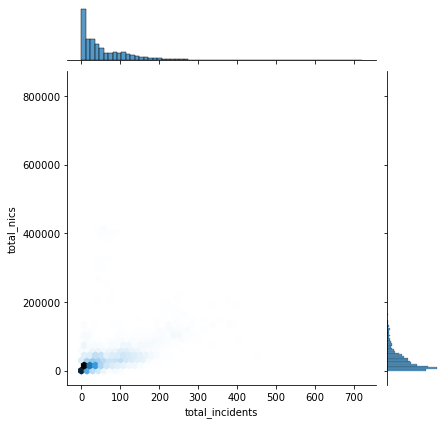

In [50]:
sns.jointplot(merged_df.total_incidents,merged_df.total_nics, kind ="hex")

<ipython-input-51-e5bee5bd9b09>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_correlations, dtype=np.bool)


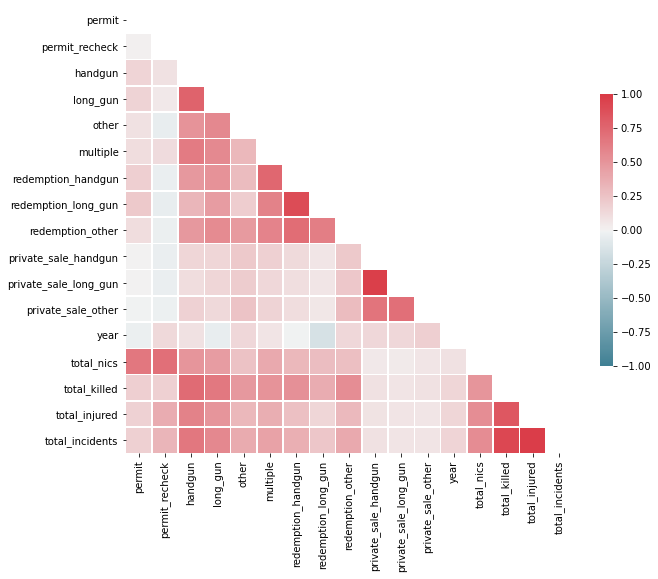

In [51]:
df_correlations = merged_df.corr()
#mask the upper half for visualization purposes
mask = np.zeros_like(df_correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize= (10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_correlations,mask=mask,  vmax=1, vmin=-1, cmap=cmap, 
            center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

This correlation matrix shows us that private sales don't have a strong correlation and that there is a slight correlation betweeen total incidents and handguns


<ipython-input-65-e7ab948b41fc>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_correlations, dtype=np.bool)


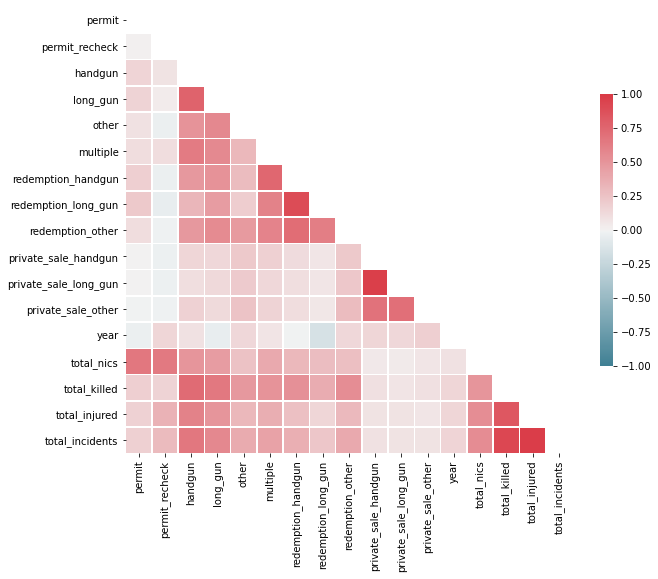

In [65]:
df_correlations = merged_df2.corr()
#mask the upper half for visualization purposes
mask = np.zeros_like(df_correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize= (10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_correlations,mask=mask,  vmax=1, vmin=-1, cmap=cmap, 
            center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

We can see in the correlation matrix above that  the total number of incidents as well as the total number of injuries and killed have a positive correlation with NICS variables, specially total number of incidents and hanguns, with a correlation of 0.67


In [70]:
formula1="total_incidents~total_nics"
model1=sm.ols(formula=formula1,data=merged_df)
fitted1=model1.fit()
print(fitted1.summary())

                            OLS Regression Results                            
Dep. Variable:        total_incidents   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     1909.
Date:                Sat, 07 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:23:32   Log-Likelihood:                -25096.
No. Observations:                4451   AIC:                         5.020e+04
Df Residuals:                    4449   BIC:                         5.021e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.7212      1.223     34.121      0.0

In [71]:
#formula for nan values that are zeroes
formula1_nonan="total_incidents~total_nics"
model1_nonan=sm.ols(formula=formula1_nonan,data=merged_df2)
fitted1_nonan=model1_nonan.fit()
print(fitted1_nonan.summary())

                            OLS Regression Results                            
Dep. Variable:        total_incidents   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     1909.
Date:                Sat, 07 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:23:33   Log-Likelihood:                -25096.
No. Observations:                4451   AIC:                         5.020e+04
Df Residuals:                    4449   BIC:                         5.021e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.7212      1.223     34.121      0.0

In [72]:
formula2="total_incidents~total_nics + C(state)"
model2=sm.ols(formula=formula2,data=merged_df)
fitted3=model2.fit()
print(fitted2.summary())

                            OLS Regression Results                            
Dep. Variable:        total_incidents   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     1909.
Date:                Sat, 07 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:23:37   Log-Likelihood:                -25096.
No. Observations:                4451   AIC:                         5.020e+04
Df Residuals:                    4449   BIC:                         5.021e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.7212      1.223     34.121      0.0

In [73]:
#model for nonans
formula2_nonan="total_incidents~total_nics + C(state)"
model2_nonan=sm.ols(formula=formula2_nonan,data=merged_df2)
fitted2_nonan=model2_nonan.fit()
print(fitted2_nonan.summary())

                            OLS Regression Results                            
Dep. Variable:        total_incidents   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     272.0
Date:                Sat, 07 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:23:44   Log-Likelihood:                -22721.
No. Observations:                4451   AIC:                         4.555e+04
Df Residuals:                    4399   BIC:                         4.588e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [77]:
formula3="total_incidents~total_nics + C(state) + handgun + long_gun + other"
model3=sm.ols(formula=formula3,data=merged_df)
fitted3=model3.fit()
print(fitted3.summary())

                            OLS Regression Results                            
Dep. Variable:        total_incidents   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     307.0
Date:                Sat, 07 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:25:24   Log-Likelihood:                -22413.
No. Observations:                4451   AIC:                         4.494e+04
Df Residuals:                    4396   BIC:                         4.529e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [56]:
fitted3.params

Intercept                            81.455497
C(state)[T.Alaska]                  -73.132815
C(state)[T.Arizona]                 -45.185827
C(state)[T.Arkansas]                -42.339492
C(state)[T.California]              120.070424
C(state)[T.Colorado]                -51.296846
C(state)[T.Connecticut]             -53.084392
C(state)[T.Delaware]                -62.891690
C(state)[T.District of Columbia]    -40.663577
C(state)[T.Florida]                  89.194709
C(state)[T.Georgia]                  27.268686
C(state)[T.Hawaii]                  -78.398444
C(state)[T.Idaho]                   -79.426275
C(state)[T.Illinois]                168.046878
C(state)[T.Indiana]                 -16.781244
C(state)[T.Iowa]                    -63.420017
C(state)[T.Kansas]                  -55.630373
C(state)[T.Kentucky]               -104.284240
C(state)[T.Louisiana]                36.266686
C(state)[T.Maine]                   -78.793776
C(state)[T.Maryland]                 17.169473
C(state)[T.Ma

In [ ]:
# poop=pd.merge(df_nin, df_nkill[["state","year","n_killed"]], on=["state","year"])
# poop

In [ ]:
# poop["year"]=poop["year"].astype(str).astype(int)

In [ ]:
# df_policytotal

In [ ]:
# loop=pd.merge(poop, df_policytotal[["state","year","lawtotal"]], on=["state","year"])
# loop

In [ ]:
# loop.to_csv(r'stateyear_injuredkilled.csv')

In [ ]:
# loop.head(50)

In [ ]:
# loop(n_injured)

In [ ]:
# column_1 = loop["lawtotal"]
# column_2 = loop["n_killed"]
# correlation = column_1.corr(column_2)
# correlation

In [ ]:
column_3 = loop["lawtotal"]
column_4 = loop["n_injured"]
correlation2 = column_3.corr(column_4)
correlation2

In [ ]:
# df_correlations = loop.corr()
# #mask the upper half for visualization purposes
# mask = np.zeros_like(df_correlations, dtype=bool)
# mask[np.triu_indices_from(mask)] = True
# # Draw the heatmap with the mask and correct aspect ratio
# plt.figure(figsize= (10,10))
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
# sns.heatmap(df_correlations,mask=mask,  vmax=1, vmin=-1, cmap=cmap,
#             center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [ ]:
# formula1="n_injured~lawtotal"
# model1=sm.ols(formula=formula1,data=loop)
# fitted1=model1.fit()
# print(fitted1.summary())